In [1]:
from ThesisFunctions import *

In [3]:
noise_level = 10
num_datapoints = 4


num_minmas = 1

maxima_checks = None
positive_roots_b = None
params = None
Maxima_checks = None
data = None

while True:
    data = data_gen(num_datapoints, noise_level, 1, 1)
    x_i = np.array(data['Data'].values)
    t_i = np.array(data['Time'].values)
    #print(data)
        
    # Calculate the Groebner basis.
    B = groeb(x_i, t_i)
                            
    # Find positive real roots.
    positive_roots_b = roots_symbolic(B[1])
            
    # Determine (x0, alpha) pairs.
    params = find_x0_alpha_pairs(B, positive_roots_b)
    
    # Evaluate the Hessian to check for minima.
    maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
    
    # Count the number of minima.
    num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
    print(num_minimas)
    
    if num_minimas == 0: 
        break

Matrix([[2.03282005011172, 3.50364349017357], [3.50364349017357, -692.473886227334]])
Matrix([[221.531106748158, 733.792440158403], [733.792440158403, 2501.42987784770]])
1
Matrix([[2.00927459646567, 0.666596991090017], [0.666596991090017, -317.357843454314]])
Matrix([[396.674653905187, 893.369265807839], [893.369265807839, 2086.65301496110]])
1
Matrix([[13.4180868177326, -63.1055817539213], [-63.1055817539213, -4.16231379330495e-13]])
Matrix([[2.21089482863472, -6.73700124241838], [-6.73700124241838, 684.870111514926]])
Matrix([[71507.8425908122, 1454.26538676912], [1454.26538676912, 30.0388245908191]])
2
Matrix([[5.74225064817507, -65.6332777918580], [-65.6332777918580, -5.41573317015146e-13]])
Matrix([[2.26160700886655, -5.82861530993237], [-5.82861530993237, 914.746053314332]])
Matrix([[849.162840596753, 462.346668863617], [462.346668863617, 277.032374173150]])
2
Matrix([[19.6712051280947, -84.2441259325583], [-84.2441259325583, 5.04792319320889e-13]])
Matrix([[2.66400295720296, -1

In [4]:
data

,Time,Data
0,0,-547/100
1,1,33/5
2,2,17/100
3,3,1029/50


In [5]:
x_i = np.array(data['Data'].values)
t_i = np.array(data['Time'].values)

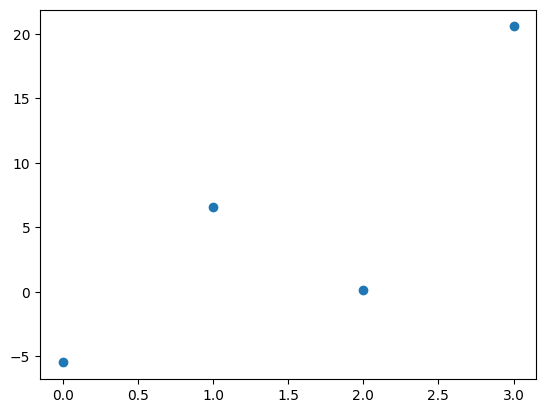

In [14]:
plt.scatter(t_i, x_i)

In [25]:
B = groeb(x_i, t_i)
B

GroebnerBasis([2329924337473472621*b**9/147651495684097250000 - 546802104024876483983*b**8/885908974104583500000 - 795731636097974833229*b**7/177181794820916700000 - 2572464789456087839633*b**6/295302991368194500000 - 3690958094730521544939*b**5/295302991368194500000 - 4640592498866561848961*b**4/885908974104583500000 - 22539665642880966265321*b**3/885908974104583500000 + 1420552859743292681723*b**2/885908974104583500000 - 5990493645981364607471*b/885908974104583500000 + x0 + 94530818402186707929/14765149568409725000, b**10 - 1518515*b**9/34986 - 563084*b**8/5831 - 3818362*b**7/17493 - 504094*b**6/5831 - 7054156*b**5/17493 - 23914*b**4/5831 - 805880*b**3/5831 + 497083*b**2/5831 - 6929*b/2058 + 60170/5831], x0, b, domain='QQ', order='lex')

In [20]:
positive_roots_b = roots_symbolic(B[1])

In [21]:
positive_roots_b

[0.479372831222012, 45.6258665263953]

In [22]:
params = find_x0_alpha_pairs(B, positive_roots_b)

In [23]:
params

[(2.77555756156289e-16, -0.7352766310491831),
 (0.00079327190769618, 3.8204748040816527)]

In [24]:
maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)

Matrix([[2.58948119052365, -41.9014690062599], [-41.9014690062599, -3.30474299033401e-14]])
Matrix([[18051172761.2230, 1625678.37569732], [1625678.37569732, 72.8874430229465]])


In [13]:
maxima_checks

[((2.77555756156289e-16, -0.7352766310491831), False),
 ((0.00079327190769618, 3.8204748040816527), False)]

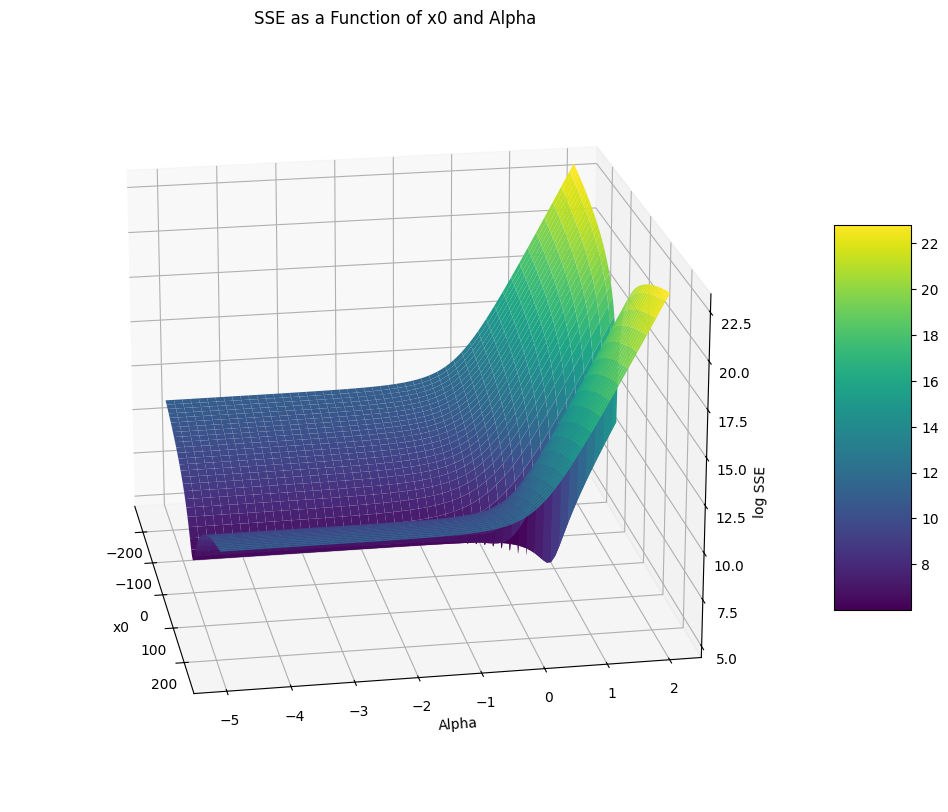

In [18]:
# Define the range for alpha and x0
alpha_range = np.linspace(-5, 2, 100)  # Adjust the range as needed
x0_range = np.linspace(-250, 250, 200)  # Adjust the range as needed


# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)


# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)


# Compute SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params_ = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params_, data)

        
# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


# Surface plot with log scale (since data is exponential)
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')


# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')


# Colorbar to show the SSE scale better/clearer
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=20, azim=-10)

# Show the plot with the adjusted view
plt.show()
